In [51]:
import matplotlib.pyplot as plt 
import re

In [52]:
result = !echo 20220507 | docker-compose run --no-deps --rm api3

In [53]:
for i, line in enumerate(result):
    if len(line) >= 13:
        if line[5:13] == 'yyyymmdd':
            start = i
data = result[start:]

In [54]:
p = re.compile("[0-9]+\.*[0-9]*")

In [55]:
local_data = {}
time_start = int(p.findall(data[0])[0])//100
time_end = int(p.findall(data[-1])[0][:-2])
for d in data:
    temp = p.findall(d)
    x = int(temp[1])
    y = int(temp[2])
    local_data.setdefault((x, y), {})
    local_data[(x, y)].setdefault('temperature', [])
    local_data[(x, y)].setdefault('humidity', [])
    local_data[(x, y)].setdefault('wind', [])
    local_data[(x, y)]['temperature'].append(float(temp[3]))
    local_data[(x, y)]['humidity'].append(int(temp[8]))
    local_data[(x, y)]['wind'].append(float(temp[10]))

In [56]:
x, y = 60, 120

In [57]:
time_list = []
for i in range(time_start, time_end+1):
    time_list.append(i)

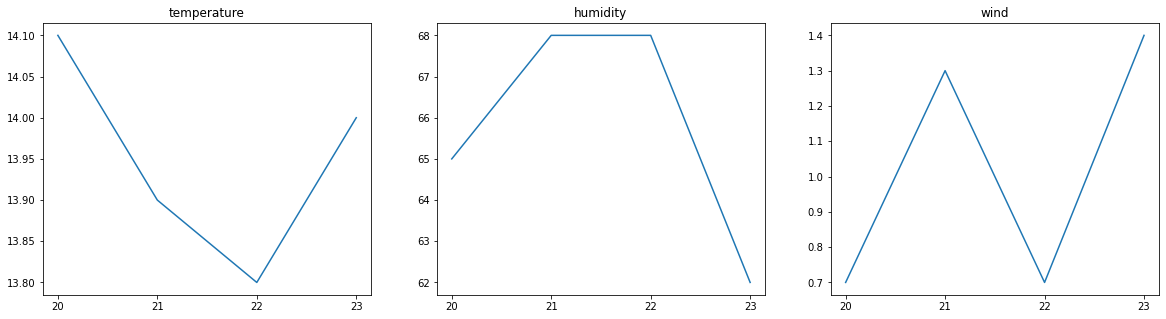

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(time_list,local_data[(x, y)]['temperature'])
plt.title('temperature')
plt.xticks(time_list)
plt.subplot(1,3,2)
plt.plot(time_list, local_data[(x, y)]['humidity'])
plt.title('humidity')
plt.xticks(time_list)
plt.subplot(1,3,3)
plt.plot(time_list, local_data[(x, y)]['wind'])
plt.title('wind')
plt.xticks(time_list)
plt.show()